## This code applies Keras mased CNN model to classify MNIST dataset. Achieved 99.6% validation accuracy

####Importing numpy package and importing keras modules Sequential (layers placed one after other linearly), Flatten (Data format will be changed to 1D), Convolutions2D (Provides convolutional layer in 2D spatial domain), Dropout(randomly sets some of the weights to 0 to prevent overfitting), Activation(provides activation functionality), Maxpooling2D (passes the maximum value within a kernel region to next layer). Also importing mnist dataset.

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


####To load the MNIST dataset( contains 28x28 handwritten digit images). It has 60000 images for training and 10000 images for testing and is saved as X_train and X_test respectively. It labels them as y_train and y_test

In [0]:
(trainX, trainy), (testX, testy) = mnist.load_data()
testX_orig=testX

#### The following block reshapes the training and testing image samples into 28x28x1

In [0]:
trainX = trainX.reshape(trainX.shape[0], 28, 28,1)
testX = testX.reshape(testX.shape[0], 28, 28,1)

#### The following block of code modifies the type of the image intensities to float and then normalizes the intensities to be within the range of 0-1

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

####To convert 1D array to 10D array

In [0]:
trainY = np_utils.to_categorical(trainy, 10)
testY = np_utils.to_categorical(testy, 10)

#### Applying image normalization to both training and validation images

In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# demonstrate effect on a single batch of samples
train_iterator = datagen.flow(trainX, trainY, batch_size=128)
valid_iterator = datagen.flow(testX, testY, batch_size=128, shuffle='False')

### Model is Defined
####The following are the highlights of this network:
####1) Channels reduced and number of parameters reduced
####2) Adaptive Learning rate is used
####3) Batch size is increased
####4) L2 Regularizer is used
####5) Activation is applied post Batch normlization

In [7]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=l2(0.0005))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.0005))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, kernel_regularizer=l2(0.0005))) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4,kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarni

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

#### Loss function is selected along with adam optimizer. Adaptive learning rate is used. Model to be saved when the validation accuracy is highest among the 40 epochs

In [8]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', verbose=1)

model.fit_generator(train_iterator, steps_per_epoch=512,nb_epoch=40, verbose=1, validation_data=valid_iterator, validation_steps=64, callbacks=[mcp_save,LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=512, verbose=1, validation_data=<keras_pre..., validation_steps=64, callbacks=[<keras.ca..., epochs=40)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
512/512 [==============================] - 11s 21ms/step - loss: 0.5735 - acc: 0.8525 - val_loss: 0.2258 - val_acc: 0.9741

Epoch 00001: val_acc improved from -inf to 0.97412, saving model to .mdl_wts.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
512/512 [==============================] - 8s 16ms/step - loss: 0.2907 - acc: 0.9255 - val_loss: 0.1151 - val_acc: 0.9858

Epoch 00002: val_acc improved from 0.97412 to 0.98577, saving model to .mdl_wts.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
512/512 [==============================] - 8s 16ms/step - loss: 0.2315 - acc: 0.9403 - val_loss: 0.0779 - val_acc: 0.9908

Epoch 00003: val_acc improved from 0.98577 to 0.99084, saving model to .mdl_wts.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
512/512 [==============================] - 8s 16ms/s

### Got Validation accuracy of 99.60 %

#### Model is evaluated on validation data

In [9]:
score = model.evaluate_generator(valid_iterator, steps=testX.shape[0]//128, verbose=1)
print(score)

43/78 [===============>..............] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


78/78 [==============================] - 0s 4ms/step
[0.033263134157263965, 0.9945299837925445]


### Got evaluation accuracy of 99.45%

####Best model that was saved is retrieved

In [0]:
best_model = load_model('.mdl_wts.hdf5')

#### Classes are predicted in the testing images using the saved best model

In [11]:
predY = best_model.predict_generator(datagen.flow(testX, testY, batch_size=128, shuffle=False),steps=np.ceil(len(testX)/128), verbose=1, workers=0)  

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 1s 8ms/step


#### Original test image labels and predicted labels are captured

In [0]:
testY_label=np.argmax(testY,axis=1)
predY_label=np.argmax(predY,axis=1)

#### The indexes of the test images that are misclassified are obtained

In [0]:
n=len(testY)
c=[]
for i in range(n):
    if predY_label[i]!=testY_label[i]:
        c.append(i)

#### To print the misclassified label indexes of test images

In [14]:
print(c)
len(c)

[321, 359, 445, 449, 625, 646, 938, 947, 956, 1014, 1232, 1299, 1530, 1878, 1901, 2035, 2130, 2135, 2414, 2454, 2597, 2654, 2896, 3030, 3225, 3337, 3422, 3558, 4176, 4201, 4369, 4497, 4699, 4740, 4761, 4814, 5937, 6571, 6576, 6597, 6651, 8408, 8527, 9638, 9642, 9664, 9729]


47

#### Test image predicted classes accuracy is obtained

In [15]:
predicted_accuracy = sum([predY_label[j]==testY_label[j] for j in range(n)])/n
print(predicted_accuracy)

0.9953


### Got Prediction accuracy of 99.53%

#### To plot the 1st 25 misclassified test images.

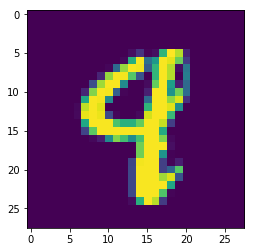

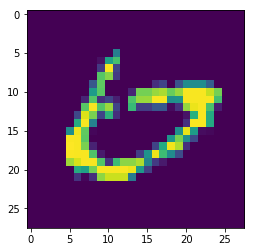

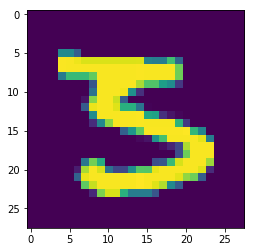

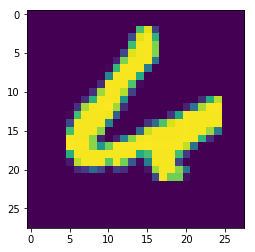

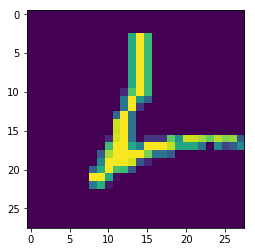

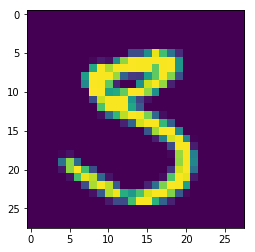

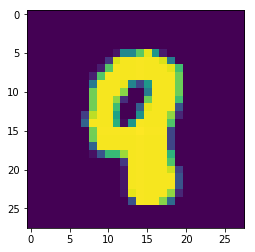

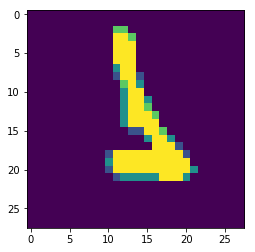

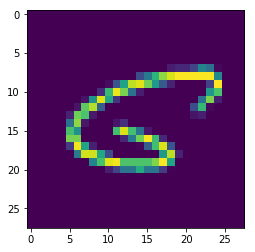

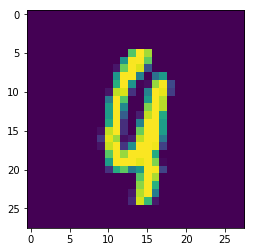

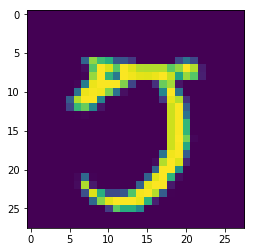

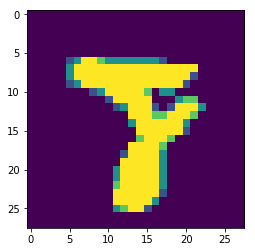

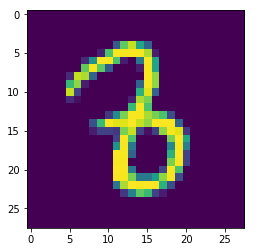

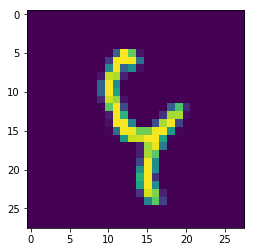

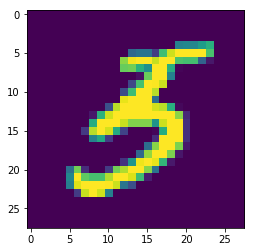

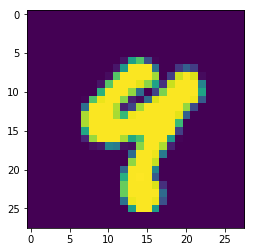

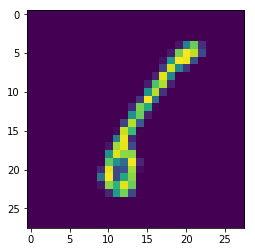

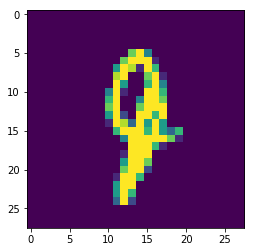

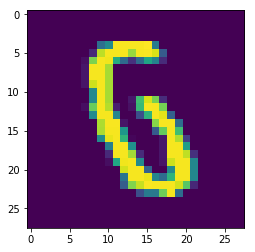

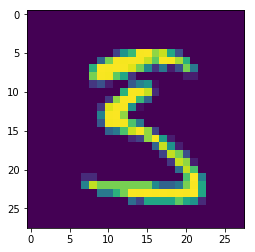

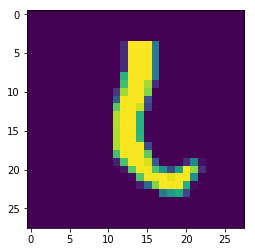

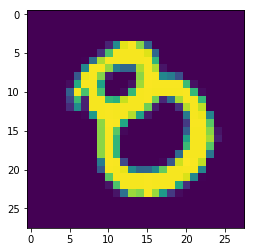

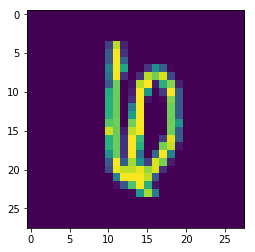

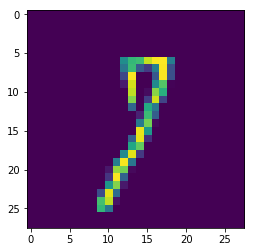

In [16]:
import matplotlib.pyplot as plt
c=c[0:25]

fig, ax = plt.subplots(5, 5, figsize=(28, 28))
for k in range(1,25):
  idx=c[k]
  z=testX_orig[idx]
  %matplotlib inline
  plt.imshow(z)
  plt.show()